✓ Libraries imported successfully
Dataset shape: (12294, 7)

Column names: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

First few rows:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   67357

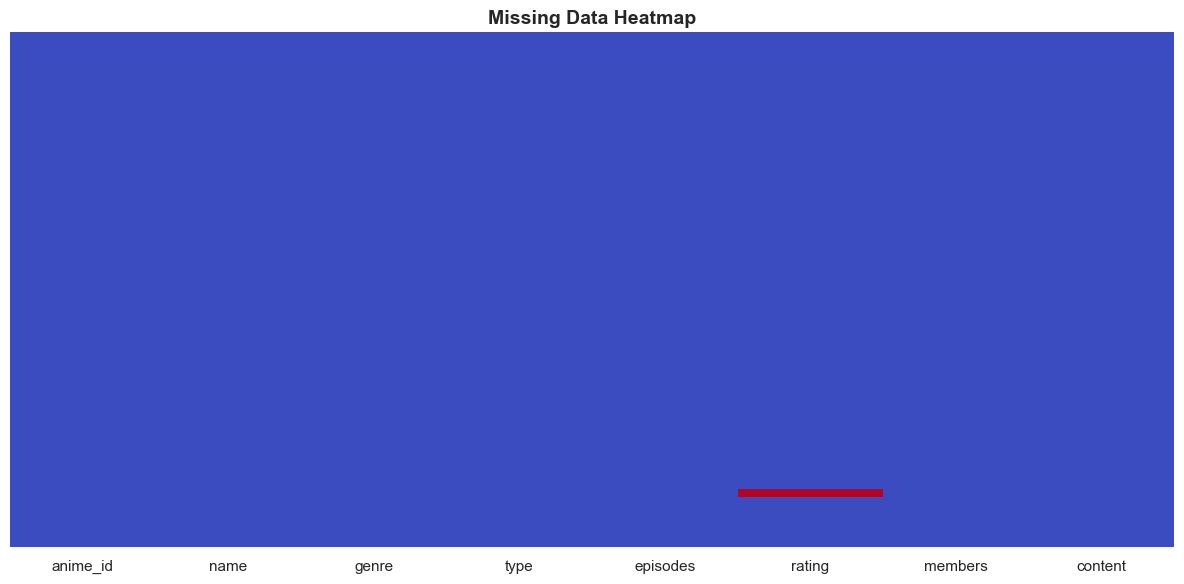

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\4044543647.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='rating', data=anime, palette='Set2')


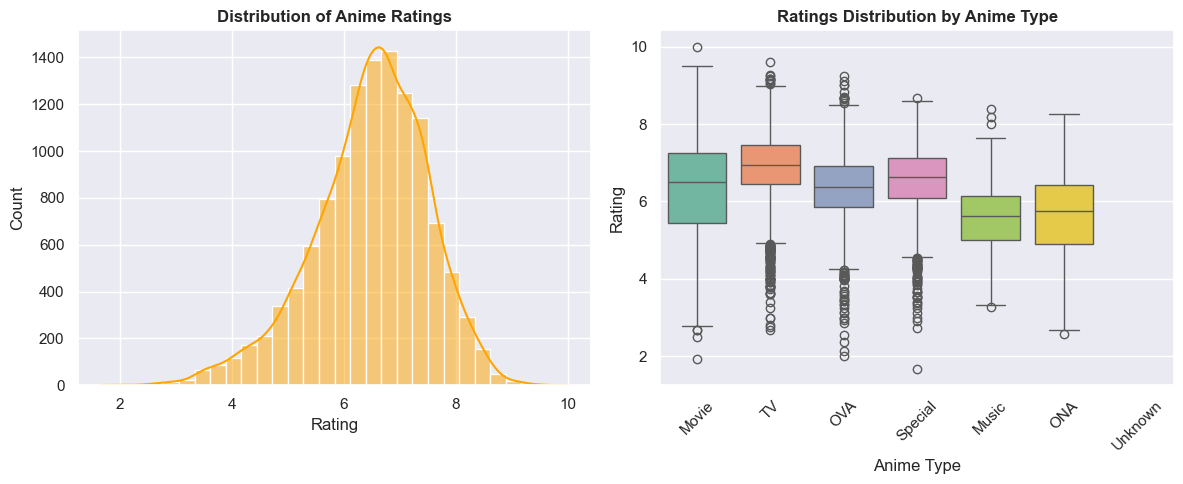

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\4044543647.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_rated, palette='magma')


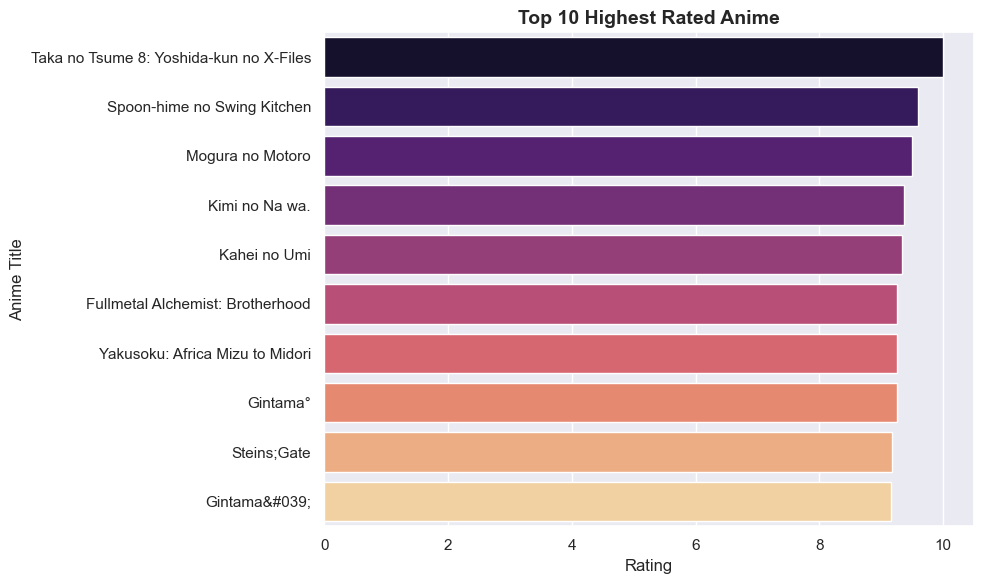

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\4044543647.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')


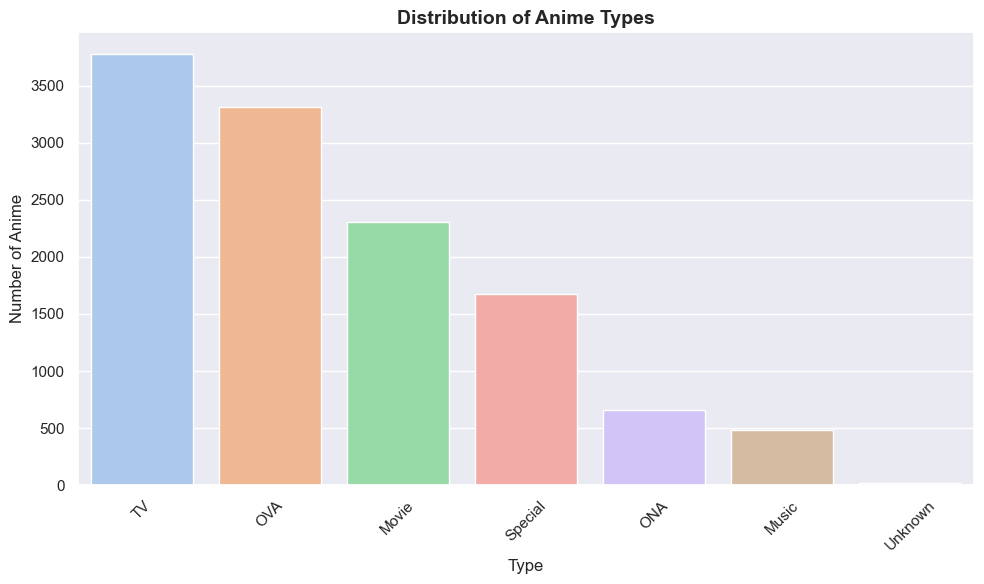

C:\Users\HP\AppData\Local\Temp\ipykernel_2784\4044543647.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Genre', x='Count', data=top_genres, palette='cool')


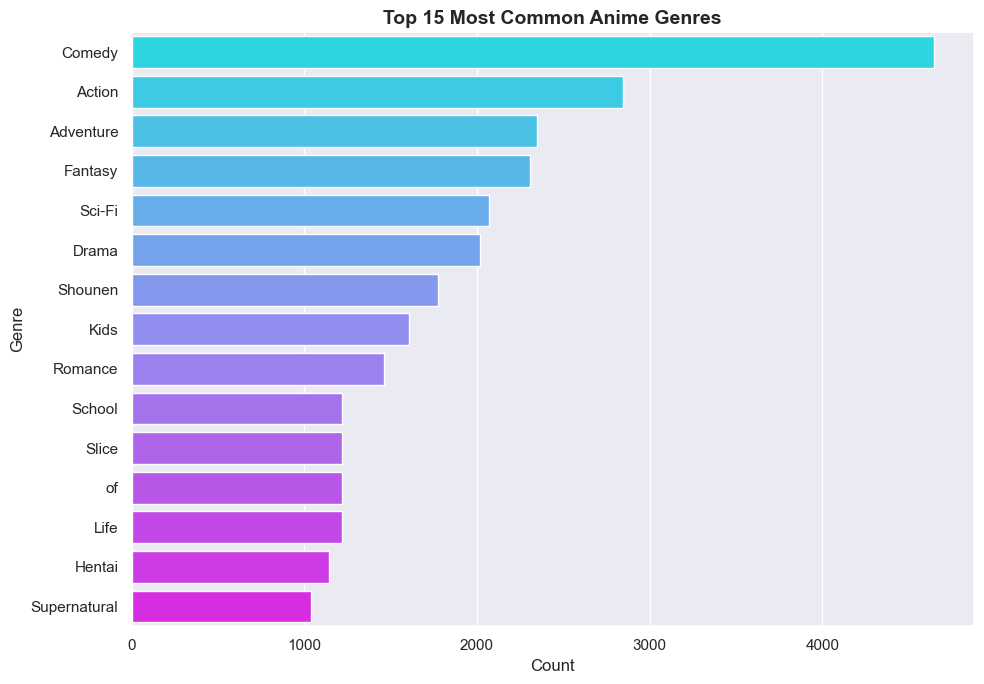

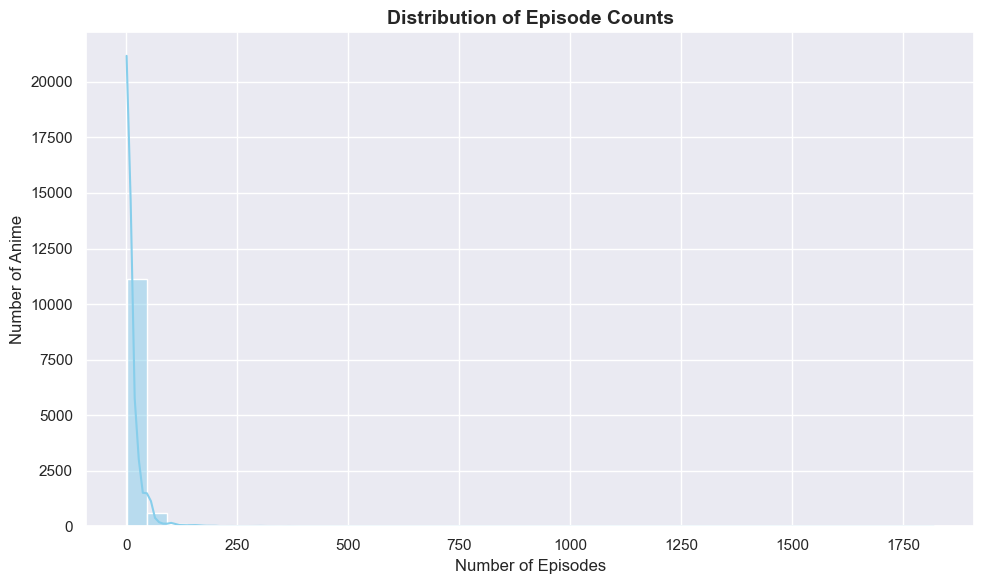

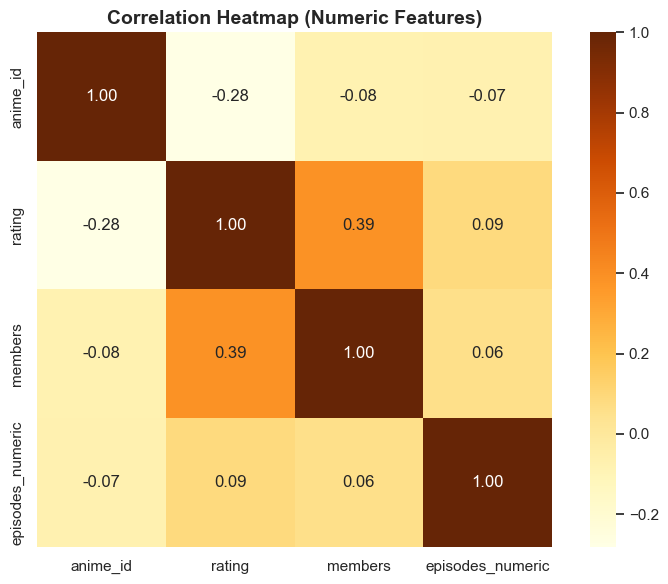


TF-IDF VECTORIZATION

✓ TF-IDF vectorization completed successfully
TF-IDF Matrix Shape: (12232, 5000)
Number of features extracted: 5000
Matrix density: 0.0014

COSINE SIMILARITY COMPUTATION

✓ Cosine similarity matrix computed
Similarity Matrix Shape: (12232, 12232)

Sample similarity scores (first 5x5):
[[1.         0.0382444  0.         0.         0.        ]
 [0.0382444  1.         0.09065395 0.02058324 0.0836301 ]
 [0.         0.09065395 1.         0.11809402 0.92252018]
 [0.         0.02058324 0.11809402 1.         0.10894412]
 [0.         0.0836301  0.92252018 0.10894412 1.        ]]

RECOMMENDATION EXAMPLES

📺 Example 1: Recommendations for 'Naruto'
----------------------------------------------------------------------
                            name                                                genre   type  rating  similarity_score
1343                 Naruto x UT   Action  Comedy  Martial Arts  Shounen  Super Power    OVA    7.58          0.968046
719   The Last: Naruto 

In [1]:
# 🎌 Anime Recommendation System using Machine Learning
# This notebook builds an Anime Recommendation System using the Anime Recommendations Dataset from Kaggle.
# It follows the structure of the Netflix recommendation notebook, adapted for anime data.

# ============================================================================
# Step 1: Import Libraries
# ============================================================================

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

print("✓ Libraries imported successfully")

sns.set_theme(style="darkgrid")
sns.set_palette("husl")

# ============================================================================
# Step 2: Load Dataset
# ============================================================================

anime = pd.read_csv('anime.csv')
print(f"Dataset shape: {anime.shape}")
print(f"\nColumn names: {anime.columns.tolist()}")
print(f"\nFirst few rows:\n{anime.head()}")

# ============================================================================
# Step 3: Data Cleaning & Preprocessing
# ============================================================================

# Drop rows with missing genre values
anime.dropna(subset=['genre'], inplace=True)

# Replace commas in genre with spaces (for better text processing)
anime['genre'] = anime['genre'].str.replace(',', ' ')

# Handle missing values in type
anime['type'] = anime['type'].fillna('Unknown')

# Create combined content column for TF-IDF vectorization
# This combines name, genre, and type
anime['content'] = anime['name'] + ' ' + anime['genre'] + ' ' + anime['type'].astype(str)

print(f"\n✓ Data preprocessing completed")
print(f"Cleaned dataset shape: {anime.shape}")
print(f"\nSample content values:")
for i in range(min(5, len(anime))):
    print(f"{i+1}. {anime['content'].iloc[i][:80]}...")

# ============================================================================
# Step 4: Data Visualization - Missing Values
# ============================================================================

plt.figure(figsize=(12, 6))
sns.heatmap(anime.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)
plt.title("Missing Data Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# Step 5: Data Visualization - Rating Distribution
# ============================================================================

plt.figure(figsize=(12, 5))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(anime['rating'].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribution of Anime Ratings", fontsize=12, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Count")

# Subplot 2: Boxplot by Type
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='rating', data=anime, palette='Set2')
plt.title("Ratings Distribution by Anime Type", fontsize=12, fontweight='bold')
plt.xlabel("Anime Type")
plt.ylabel("Rating")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ============================================================================
# Step 6: Data Visualization - Top Rated Anime
# ============================================================================

top_rated = anime.dropna(subset=['rating']).sort_values('rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_rated, palette='magma')
plt.title("Top 10 Highest Rated Anime", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Anime Title")
plt.tight_layout()
plt.show()

# ============================================================================
# Step 7: Data Visualization - Anime Type Distribution
# ============================================================================

plt.figure(figsize=(10, 6))
type_counts = anime['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.title("Distribution of Anime Types", fontsize=14, fontweight='bold')
plt.xlabel("Type")
plt.ylabel("Number of Anime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# Step 8: Data Visualization - Most Common Genres
# ============================================================================

from collections import Counter

# Split and count genres
genre_list = anime['genre'].dropna().apply(lambda x: [i.strip() for i in x.split()])
genre_counts = Counter([genre for sublist in genre_list for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])

plt.figure(figsize=(10, 7))
sns.barplot(y='Genre', x='Count', data=top_genres, palette='cool')
plt.title("Top 15 Most Common Anime Genres", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# ============================================================================
# Step 9: Data Visualization - Episodes Distribution
# ============================================================================

# Handle 'Unknown' episodes and convert to numeric
anime['episodes_numeric'] = anime['episodes'].replace('Unknown', np.nan)
anime['episodes_numeric'] = pd.to_numeric(anime['episodes_numeric'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(anime['episodes_numeric'].dropna(), bins=40, color='skyblue', kde=True)
plt.title("Distribution of Episode Counts", fontsize=14, fontweight='bold')
plt.xlabel("Number of Episodes")
plt.ylabel("Number of Anime")
plt.tight_layout()
plt.show()

# ============================================================================
# Step 10: Data Visualization - Correlation Heatmap
# ============================================================================

numeric_cols = anime.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlOrBr', fmt=".2f", square=True)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# Step 11: TF-IDF Vectorization
# ============================================================================

print("\n" + "="*70)
print("TF-IDF VECTORIZATION")
print("="*70)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the content column
tfidf_matrix = tfidf.fit_transform(anime['content'])

print(f"\n✓ TF-IDF vectorization completed successfully")
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"Number of features extracted: {len(tfidf.get_feature_names_out())}")
print(f"Matrix density: {tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]):.4f}")

# ============================================================================
# Step 12: Compute Cosine Similarity
# ============================================================================

print("\n" + "="*70)
print("COSINE SIMILARITY COMPUTATION")
print("="*70)

# Compute cosine similarity between all anime
similarity = cosine_similarity(tfidf_matrix)

print(f"\n✓ Cosine similarity matrix computed")
print(f"Similarity Matrix Shape: {similarity.shape}")
print(f"\nSample similarity scores (first 5x5):")
print(similarity[:5, :5])

# ============================================================================
# Step 13: Define Recommendation Function
# ============================================================================

def recommend_anime(title, top_n=10):
    """
    Recommend anime based on content similarity.
    
    Parameters:
    -----------
    title : str
        Name of the anime to get recommendations for
    top_n : int
        Number of recommendations to return (default=10)
        
    Returns:
    --------
    DataFrame : Top N recommended anime with details
    """
    
    # Check if anime exists in dataset
    if title not in anime['name'].values:
        print(f"❌ '{title}' not found in database.")
        return None
    
    # Get index of the anime
    idx = anime[anime['name'] == title].index[0]
    
    # Get similarity scores with all other anime
    sim_scores = list(enumerate(similarity[idx]))
    
    # Sort by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N+1 indices (excluding the anime itself)
    top_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
    # Get similarity scores for recommended anime
    sim_values = [sim_scores[i][1] for i in range(1, top_n+1)]
    
    # Return recommended anime with details
    recommendations = anime[['name', 'genre', 'type', 'rating']].iloc[top_indices].copy()
    recommendations['similarity_score'] = sim_values
    
    return recommendations

# ============================================================================
# Step 14: Test the Recommender System
# ============================================================================

print("\n" + "="*70)
print("RECOMMENDATION EXAMPLES")
print("="*70)

# Example 1
print("\n📺 Example 1: Recommendations for 'Naruto'")
print("-" * 70)
result_1 = recommend_anime('Naruto', top_n=5)
if result_1 is not None:
    print(result_1.to_string())

# Example 2
print("\n\n📺 Example 2: Recommendations for 'Death Note'")
print("-" * 70)
result_2 = recommend_anime('Death Note', top_n=5)
if result_2 is not None:
    print(result_2.to_string())

# Example 3
print("\n\n📺 Example 3: Recommendations for 'Fullmetal Alchemist: Brotherhood'")
print("-" * 70)
result_3 = recommend_anime('Fullmetal Alchemist: Brotherhood', top_n=5)
if result_3 is not None:
    print(result_3.to_string())

# ============================================================================
# Step 15: Interactive Recommendation Function (Optional)
# ============================================================================

def interactive_recommendations():
    """
    Interactive mode for getting anime recommendations.
    """
    print("\n" + "="*70)
    print("INTERACTIVE ANIME RECOMMENDATION SYSTEM")
    print("="*70)
    
    while True:
        anime_name = input("\nEnter anime name (or 'quit' to exit): ").strip()
        
        if anime_name.lower() == 'quit':
            print("\n✓ Thank you for using the Anime Recommendation System!")
            break
        
        if anime_name == "":
            print("❌ Please enter a valid anime name")
            continue
        
        num_recs = input("How many recommendations? (default=5): ").strip()
        
        try:
            num_recs = int(num_recs) if num_recs else 5
        except ValueError:
            print("❌ Invalid input. Using default value of 5")
            num_recs = 5
        
        recommendations = recommend_anime(anime_name, top_n=num_recs)
        
        if recommendations is not None:
            print(f"\n✓ Top {num_recs} recommendations for '{anime_name}':")
            print(recommendations.to_string())

# Uncomment the line below to enable interactive mode
# interactive_recommendations()

# ============================================================================
# Step 16: Save Model and Data
# ============================================================================

print("\n" + "="*70)
print("SAVING MODEL AND DATA")
print("="*70)

# Save TF-IDF vectorizer
with open('anime_tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save cosine similarity matrix
with open('anime_similarity.pkl', 'wb') as f:
    pickle.dump(similarity, f)

# Save processed anime dataframe
anime_info = anime[['anime_id', 'name', 'genre', 'type', 'rating', 'content']].copy()
anime_info.to_csv('anime_processed.csv', index=False)

print("\n✓ Model saved successfully!")
print("  - anime_tfidf.pkl (TF-IDF Vectorizer)")
print("  - anime_similarity.pkl (Similarity Matrix)")
print("  - anime_processed.csv (Processed Data)")

# ============================================================================
# Step 17: Summary Statistics
# ============================================================================

print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"\nTotal number of anime: {len(anime)}")
print(f"Average rating: {anime['rating'].mean():.2f}")
print(f"Median rating: {anime['rating'].median():.2f}")
print(f"Highest rated anime: {anime.loc[anime['rating'].idxmax(), 'name']} ({anime['rating'].max()})")
print(f"Most common anime type: {anime['type'].value_counts().idxmax()}")
print(f"\nAnime type distribution:")
print(anime['type'].value_counts())

print("\n" + "="*70)
print("✅ ANIME RECOMMENDATION SYSTEM SETUP COMPLETED!")
print("="*70)
